In [1]:
import nltk, re, pprint
from nltk import word_tokenize

## 1.1 Accessing Text from the Web and from Disk

**Electronic Books:**

In [2]:
from urllib import request
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf-8-sig')
type(raw), len(raw), raw[:75]

(str,
 1176811,
 'The Project Gutenberg eBook of Crime and Punishment, by Fyodor Dostoevsky\r\n')

##### Tokenization:

In [3]:
tokens = word_tokenize(raw)
type(tokens), len(tokens)
print(tokens[:10])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']


In [4]:
text = nltk.Text(tokens)
print(text[1024:1062])
type(text), text.collocations()

['insight', 'impresses', 'us', 'as', 'wisdom', '...', 'that', 'wisdom', 'of', 'the', 'heart', 'which', 'we', 'seek', 'that', 'we', 'may', 'learn', 'from', 'it', 'how', 'to', 'live', '.', 'All', 'his', 'other', 'gifts', 'came', 'to', 'him', 'from', 'nature', ',', 'this', 'he', 'won', 'for']
Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Project Gutenberg; Ilya
Petrovitch; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


(nltk.text.Text, None)

##### Remove artifacts from text:

In [5]:
raw.find('PART I') # Case sensitive

5574

In [6]:
raw.rfind("END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT") # reverse find

1158052

In [7]:
raw = raw[5574:1158052]
raw.find("PART I")

0

### Dealing with HTML:

In [8]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf-8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [9]:
#print(html)

In [10]:
from bs4 import BeautifulSoup

raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
print(tokens[:20])

tokens = tokens[112:392]
print(tokens[:20])

['BBC', 'NEWS', '|', 'Health', '|', 'Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'CATEGORIES', 'TV', 'RADIO', 'COMMUNICATE', 'WHERE', 'I', 'LIVE', 'INDEX']
['Blondes', "'to", 'die', 'out', 'in', '200', "years'", 'Scientists', 'believe', 'the', 'last', 'blondes', 'will', 'be', 'in', 'Finland', 'The', 'last', 'natural', 'blondes']


In [11]:
text = nltk.Text(tokens)
text.concordance('gene')

Displaying 5 of 5 matches:
hey say too few people now carry the gene for blondes to last beyond the next 
blonde hair is caused by a recessive gene . In order for a child to have blond
 have blonde hair , it must have the gene on both sides of the family in the g
ere is a disadvantage of having that gene or by chance . They do n't disappear
des would disappear is if having the gene was a disadvantage and I do not thin


### Processing RSS feeds:

In [12]:
import feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

In [13]:
llog['feed']['title'], len(llog.entries) # blog title and number of blog entries

('Language Log', 13)

In [14]:
post = llog.entries[1]
post.title

'Shooketh, rattleth, and rolleth'

In [15]:
content = post.content[0].value
content[:700]

'<p>In his "The Good Word" column of The Atlantic (1/24/22), Caleb Madison has a new article, "Why We’re All Shooketh:\xa0 The term is online slang of Biblical proportions".\xa0 The first two paragraphs:</p>\n<p style="padding-left: 40px;">Lately modern life has felt all too biblical. Plagues, <a href="https://www.theatlantic.com/science/archive/2021/09/summer-climate-disaster/620004/">massive weather events</a>, <a href="https://www.theatlantic.com/magazine/archive/2021/07/george-packer-four-americas/619012/">tribal divisions</a>, demagogic leadership … and people using words like <em>shooketh</em>. The phrase <em>I’m shooketh</em> was first uttered by the comedian Christine Sydelko in a <a href="h'

In [16]:
raw = BeautifulSoup(content, 'html.parser').get_text()
tokens = word_tokenize(raw)

print(tokens[:50])

['In', 'his', '``', 'The', 'Good', 'Word', "''", 'column', 'of', 'The', 'Atlantic', '(', '1/24/22', ')', ',', 'Caleb', 'Madison', 'has', 'a', 'new', 'article', ',', '``', 'Why', 'We', '’', 're', 'All', 'Shooketh', ':', 'The', 'term', 'is', 'online', 'slang', 'of', 'Biblical', 'proportions', "''", '.', 'The', 'first', 'two', 'paragraphs', ':', 'Lately', 'modern', 'life', 'has', 'felt']


In [17]:
from nltk.corpus import stopwords

filtered_words = [x for x in tokens if x.lower() not in stopwords.words('english')]
print(filtered_words[:50])

['``', 'Good', 'Word', "''", 'column', 'Atlantic', '(', '1/24/22', ')', ',', 'Caleb', 'Madison', 'new', 'article', ',', '``', '’', 'Shooketh', ':', 'term', 'online', 'slang', 'Biblical', 'proportions', "''", '.', 'first', 'two', 'paragraphs', ':', 'Lately', 'modern', 'life', 'felt', 'biblical', '.', 'Plagues', ',', 'massive', 'weather', 'events', ',', 'tribal', 'divisions', ',', 'demagogic', 'leadership', '…', 'people', 'using']


### Reading local files:

In [18]:
f = open(r'D:/ML/Datasets/test_document.txt')
raw = f.read()
print(raw)

this is da text!
the rainbow fox flew over a sleepy robot


Examine files in the current directory: 

In [19]:
import os

print(os.listdir('.'))

['.git', '.gitignore', '.ipynb_checkpoints', 'accessing_text_corpora.ipynb', 'conditional_freq_dist.py', 'function_testing.py', 'getting_started.ipynb', 'lexical_resources.ipynb', 'low_level_text_processing.ipynb', 'monty.py', 'nltk_functions.py', 'processing_raw_text.ipynb', 'README.md']


NLTK's corpus files can be accessed in the same manner, we just need to get the filename first:

In [20]:
path = nltk.data.find('corpora/gutenberg/melville-moby_dick.txt')
raw = open(path).read()
#raw = open(path) # use this to insert new lines instead of '\n' characters
#for x in raw:
#    print(x.strip())
raw[:100]

'[Moby Dick by Herman Melville 1851]\n\n\nETYMOLOGY.\n\n(Supplied by a Late Consumptive Usher to a Grammar'

### Capturing user input:

In [21]:
s = input("Enter some text: ")

Enter some text: some text


In [22]:
print("You typed", len(word_tokenize(s)), "words.")

You typed 2 words.


## 1.2 Low level text processing:

**Apostrophe within text string:**

In [23]:
circus = 'Monty Python\'s Flying Circus'
circus

"Monty Python's Flying Circus"

**Text string over multiple lines:**

In [24]:
couplet = 'Shall I compare thee to a Summer\'s day?'\
          'Thou are more lovely and more temperate:'
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [25]:
couplet = ('Shall I compare thee to a Summer\'s day?'
          'Thou are more lovely and more temperate:')
print(couplet)

Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:


In [26]:
couplet = """Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:"""
print(couplet)

Shall I compare thee to a Summer's day?
Thou are more lovely and more temperate:


**Operations on strings:**

In [27]:
'very' * 3

'veryveryvery'

In [28]:
a = [1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1]
b = [' ' * 2 * (7 - i) + 'very' * i for i in a]
for line in b:
    print(line)

            very
          veryvery
        veryveryvery
      veryveryveryvery
    veryveryveryveryvery
  veryveryveryveryveryvery
veryveryveryveryveryveryvery
  veryveryveryveryveryvery
    veryveryveryveryvery
      veryveryveryvery
        veryveryvery
          veryvery
            very


In [29]:
monty = 'Monty Python'
monty

'Monty Python'

In [30]:
print(monty)

Monty Python


In [31]:
import nltk
from nltk.corpus import gutenberg

raw = gutenberg.raw('melville-moby_dick.txt')
fdist = nltk.FreqDist(ch.lower() for ch in raw if ch.isalpha())
fdist.most_common(5)

[('e', 117092), ('t', 87996), ('a', 77916), ('o', 69326), ('n', 65617)]

***Tuple unpacking:***

In [32]:
[x for x, y in fdist.most_common(5)]

['e', 't', 'a', 'o', 'n']

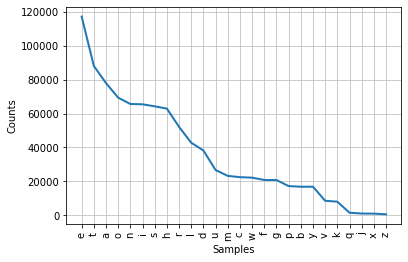

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
fdist.plot()

***Find the position of a substring within a string:***

In [34]:
monty.find('Python'), monty.rfind('Python')

(6, 6)

In [35]:
monty[6:]

'Python'

In [36]:
sent = 'my sentence is the most sentenced.'
sent.split()

['my', 'sentence', 'is', 'the', 'most', 'sentenced.']

**Operations on lists:**

In [37]:
beatles = ['John', 'Paul', 'George', 'Ringo']
beatles[0] = 'John Lennon'
del beatles[-1]
beatles

['John Lennon', 'Paul', 'George']

## 1.3 Text processing with Unicode: